<p><img src="imagenes/letragrama-rgb-150.jpg" width="380" align="left"><img src="imagenes/logoLCCazul.jpg" width="170" align="right"></p>


# [Curso de Redes Neuronales](https://curso-redes-neuronales-unison.github.io/Temario/)

# Aprendizaje en redes neuronales: El algoritmo de *backpropagation*

[**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/), 18 de septiembre de 2017.

En esta libreta vamos a practicar y revisar el principal algoritmo de aprendizaje de los pesos de una  red neuronal hacia adelante. Todos los algoritmos más sofisticados son versiones y modificaciones al algoritmo de *backpropagation* o *B-prop*. Para aplicaciones reales vamos autilizar herramientas poderosas como [Tensorflow](https://www.tensorflow.org) o [Theano](http://www.deeplearning.net/software/theano/), pero es importante conocer y saber desarrollar el algoritmo básico para entender como funciona el aprendizaje en general en redes neuronales.

Vamos a asumir que todos han realizado la libreta anterior donde desarrollaron una estructura básica de una red neuronal, así como el algoritmo de reconocimiento, o *feedforward*. Para una explicacion de la estructura, es necesario que se remitan a la libreta anterior. Sin embarog resumirenos los pasos principales:



Empecemos por inicializar los modulos que vamos a requerir, así como las funciones desarrolladas en otras libretas para el calculo en feedforward de redes neuronales artificiales.

In [82]:
import numpy as np
from feedforward import *

Las funciones ya programadas las dejamos en un archivo adjunto que se llama `feedforward.py` el cual contiene las operaciones que se desarrollaron anteriormente y que agregarlas en esta libreta metería más ruido de lo que ayudaría a la comprensión. El archivo se encuentra adjunto y eres libre de consultarlo y revisarlo. En este caso nos comportamos muy poco formales y cargamos todas las funciones en el espacio de trabajo principal. Esto es porque vamos a hacer de cuenta que las acabamos de programar.

En las libretas de *Jupyter*, cuando quieres consultar la documentación de una función utilizas la combinación de teclas *shift*-*tab*. Si lo haces una vez aparece únicamente el docstring en una ventana emergente. Si utilizas *shift*-*tab* dos veces, aparece la documentación extendida (si hay), y con 3 veces la documentación completa pero en ventana emergente. Con 4 veces la documentación completa aparece en un *frame* abajo y se mantiene mientras tecleas, hasta que se cierre. Este ultimo es especialmente útil para revisar documentación de una función mientras decide uno como utilizarla.

#### Ejercicio 1: Revisa la documentación de las funciones que se listan a continuación, ya que las vamos a estar utilizando.

In [ ]:
## Revisa la documentación de cada uno de las soguientes funciones

inicializa_red_neuronal
logistica
extendida
feedforward
perdida
perdida_red

Como puedes ver las funciones anteriores (que puedes consultar en el archivo `feedforard.py`), nos permiten definir una red neuronal, estimar la salida para un conjunto de datos, así como estimar la función de pérdda con el mismo, u otro conjunto de datos.

## El algortmo de *backpropagation*

La derivada parcial de la función de pérdida respecto a cada uno de los pesos (por lo tanto el gradiente de la función de pérdida respecto al vector de todos los pesos) se obtiene mediante el algoritmo de backpropagarion. Una vez que se conoce esto, entonces es posible utilizar el resultado para optimizar los pesos mediente el método de descenso de gradiente o una variente similar.

El algoritmo de *backpropagation* (de hecho en los últimos años se conoce como *b-prop*, y solo los rucos decimos *backpropagation*) es el siguiente:

1. Calcular el vector $\delta^{(L)}$ para todos los datos a partir de $A^{L}$, $Y$ y el tipo de salida. Si utilizamos la función de pérdida correcta para cada tipo de salida, entonces esto se calcula en forma muy sencilla, tal como vimos en clases de la forma $$\delta^{(L)} = Y^T - A^{(L)}.$$

2. Para $l$ de $L-1$ hasta 1 con decrementos de $-1$:
    1. Calcular $\delta^{(l)}$ a partir de $\delta^{(l+1)}$, $W^{(l+1)}$ y $A^{(l)}$ como
       $$
       \delta^{(l)} = A^{(l)} \star (\vec{1} - A^{(l)}) \star (r(W^{(l+1)})^T \delta^{(l+1)}), 
       $$
       donde $\star$ es la multiplicación elemento a elemento de dos matrices, $\vec(1)$ es una matriz con 1 en todos sus elementos y $r(\cdot)$ es una función que elimina la primer columna de una matriz.
    2. Calcular la derivada en cada uno de los pesos como
       $$
       \frac{\partial J(W)}{w_{ij}^{(l)}} = \frac{1}{card(CA)}\sum_{\forall (x,y) \in CA} a_j^{(l-1)} \delta_i^{(l)},
       $$
       para lo cual vimos como realizarlo en forma matricial y eficiente en clases.
       
El desarrollo del algoritmo y los pasos en forma matricial se vieron con detalle en clase, por lo que aqui solo se da un pequeñño bosquejo esperando que se programe correctamente.

#### Ejercicio 1: Completa el código de la función de backpropagation (20 puntos).


In [83]:
# La función `r`, cambiada como `r_fun` para evitar confuciones 
def r_fun(matriz):
    return matriz[:, 1:]

def backpropagation(Y, A, rn):
    """
    Calcula el gradiente de los pesos de una red neuronal
    
    Parametros
    -----------
    Y: ndarray de shape (N, k) donde N es el número de ejemplos y k el número de salidas
    
    A: Una lista de matrices de activaciones por capas, obtenidas por la función `feedforward`,
       en donde A[l] es un ndarray de shape (nl, N), donde N es el número de ejemplos evaluados 
       y nl es el número de neuronas de la capa l de rn.

    rn: Estructura de datos de una red neuronal inicializada con la función 
        `inicializa_red_neuronal`
    
    Devuelve
    --------
    Una lista de gradientes [None, gW1, gW2, ..., gWL], donde cada gWl es un ndarray tal que 
    rn['W'][l].shape == gWl.shape
             
    """    
    # Numero de ejemplos
    N = Y.shape[0]
    
    # Inicializa la lista de gradientes en 0
    gradientes = [None] + [np.zeros_like(Wl) for Wl in rn['W'][1:]]

    # Calcula Delta para la capa de salida
    delta = Y.T - A[-1]
    
    #Calcula el gradiente de los pesos de la última capa
    gradientes[-1] = -delta.dot(extendida(A[-2]).T) / N
    
    # Despues vamos a hacer lo propio por cada capa hasta antes de la última
    for l in range(rn['capas'] - 2, 0, -1):         
        
        # Calcula la delta para la capa anterior.        
        # ----------Agregar código aqui -----------------
        delta=A[l]*(1-A[l])*r_fun(rn['W'][l+1]).T.dot(delta)
        #print(delta)
        # Calcula el gradiente para los pesos de la capa anterior.        
        # ----------Agregar código aqui -----------------
        gradientes[l] = -delta.dot(extendida(A[l-1]).T) / N
        
        
    return gradientes


## Revisar y corregir código de aprendizaje máquina

El problema con este tipo de algoritmos es que, a la hora de codificarlos, es muy típico que se tengan errores, tanto de concepto como de codificación. Sin embargo, como estos algortimos se utilizan para aprender, y al utilizar un conjunto inicial de pesos aleatorio diferente, los resultados no son verificables. Es muy común tener un error muy tonto y pasar muchas horas (o días) intentando corregirlo.

Por esta razón, siempre hay que hacer métodos que nos permitan chacar que el algortimo parece funcionar correctamente. Para eso, vamos a programar una forma alternativa de calcular una aproximación del gradiente en forma numérica. Este algortimo de fuerza bruta es altamente ineficiente y no puede ser utilizada dentro de un método de optimización pero nos sirve para revisar si existen errores que podríamos haber ingresado en nuestro algoritmo.

El método se basa en el calculo numérico de una derivada parcial como:

$$
  \left.\frac{\partial f(x)}{\partial x}\right|_{x = x_0} \approx \frac{f(x_0 + \epsilon) - f(x_0 - \epsilon)}{2 \epsilon}.  
$$

Entonces, si queremos estimar el gradiente de la función de pérdida respecto a los pesos, hay que calcular esta razón por cada uno de los pesos, por cada una de las capas. Esto no es nada eficiente y mucho menos elegante (como el *b-prop*) pero es un método de validación.

#### Ejercicio: Completa el código de la función de gradiente numérico.

In [51]:
def gradiente_numerico(X, Y, rn, epsilon=1e-3):
    """
    Calcula el gradiente numérico para efectos de prueba del algoritmo de backpropagation.
    Este algortimo se realiza expresamente de manera ineficiente pero clara, ya que su
    funcionamiento debe de ser lo más claro posible.
    
    Parámetros
    ----------
    X: ndarray de shape (T, n) donde T es el número de ejemplos y n el número de atributos
    Y: ndarray de shape (T, k) donde k es el número de salidas
    rn: Estructura de datos de una red neuronal inicializada con la función `inicializa_red_neuronal``
    epsilon: Un número flotante positivo, típicamente muy pequeño
 
    Devuelve
    --------
    Una lista de gradientes de red_neuronal['W'] con la misma estructura y dimensión
    
    """
    # inicializa los gradientes a cero
    gradientes = [None] + [np.ones_like(Wl) for Wl in rn['W'][1:]]
    #print(len(gradientes))
    for l in range(1,rn['capas']):                #  Por cada capa l
        for i in range(rn['W'][l].shape[0]):          #  Por cada renglon i
            for j in range(rn['W'][l].shape[1]):      #  Por cada columna j
                # -------------------------------------------
                # Insertar código aquí
                #print(X[i][j])
                # -------------------------------------------
                
                
                
                # --------------------------------------------
    return gradientes           
    

Ahora vamos a hacer una función de prueba utilizando un conjunto de datos reales (o un subconjunto de estos), y lo vamos a hacer para muchas posibles reinicializaciones de pesos. Este código va a servir para corregir ambos algoritmos de calculo de gradiente.  Para esto vamos a utilizar una base de datos ya conocida, la de dígitos, utilizada en la libreta de regresión softmax.

In [84]:
# Datos a utilizar para la prueba
# para no tener que estarlos cargando de nuevo cada vez

# Vamos a utilizar un subconkunto de datos y de atributos
# para que pueda funcionar el gradiente numérico en un tiempo 
# aceptable


data = np.load("datos/digitos.npz")
x_prueba = data['X_entrena'][:100,:10]  # Solo 100 datos y 10 parámetros
y_prueba = data['T_entrena'][:100,:]    # Todas las clases de los primeros 100 datos


Favor de no seguir más allá en la programación de la red neuronal hasta estar seguro que esto funcione correctamente.

In [50]:
def prueba_gradiente(X, Y):
    """
    Unidad de prueba de backpropagation
    
    """
    n0 = X.shape[1]
    nL = Y.shape[1]
    
    for ocultas in [2, 3]: 
        for neuronas in [2, 3]:
            rn = inicializa_red_neuronal(ocultas + 2, 
                                         [n0] + (ocultas * [neuronas * n0]) + [nL],
                                         'lineal')

            for tipo in ['lineal', 'logistica', 'softmax']:
                rn['tipo'] = tipo
                A = feedforward(X, rn)
                gradientes = backpropagation(Y, A, rn)
                gradientes_numericos = gradiente_numerico(X, Y, rn, 1e-3)
                diferencias = [np.abs(g - gn).max() 
                               for (g, gn) in zip(gradientes[1:], 
                                                  gradientes_numericos[1:])]
                print("Tipo: {}, Neuronas: {}".format(rn['tipo'], rn['nxc']))
                print("Máxima diferencia entre métodos de gradiente: {}".format(max(diferencias)))
                if max(diferencias) > 1e-3:
                    print('Gradiente: \n{}'.format(gradientes[-1][0,:]))
                    print('Gradiente Numérico: \n{}'.format(gradientes_numericos[-1][0,:]))

                assert max(diferencias) < 1e-3
    return "Paso la prueba"

print(prueba_gradiente(x_prueba, y_prueba))



AttributeError: 'list' object has no attribute 'shape'

## El algoritmo de descenso de gradiente 

Ya que estamos seguros que el método de *b-prop* funciona correcatamente, entonces ya podemos poner todo junto muy fácilmente para realizar aprendizaje. Para esto vamos a utilizar el método de descenso de gradiente, el cual, en su forma más simple por lotes no es más que repetir por un número de veces (*epochs*) el calculo del gradiente y modificar los pesos de la red en dirección contraria a estos. 

En forma de algoritmo esto sería realizar los siguientes pasos:

1. De 1 a `max_epochs`:
    1. Calcular las activaciones `A` con el algoritmo de *feedforward*
    2. Calcular los gradientes $\nabla W^{(l)}$ para toda capa $l$, con el algoritmo de *backpropagation*.
    3. Actualizar los pesos como
       $$
       W^{(l)} \leftarrow W^{(l)} - \alpha \nabla W^{(l)} 
       $$
       
Como vemos, en este algoritmo solo hay que especificar dos variables, la tasa de aprendizaje $\alpha$ y el número máximo de *epochs*. Este algoritmo solo lo ponemos como una primera aproximación, pero es un método de base del cual partiremos para realizar mejores algoritmos de aprendizaje.

#### Ejercicio: Completa el código de la función de descenso de gradiente.

In [89]:
def desc_grad_simple(rn, X, Y, alfa=0.2, max_epochs=1000, normaliza=False):
    """
    Entrena una red neuronal utilizando el método de descenso de gradiente simple
    
    Parámetros
    ----------
    rn: Estructura de datos de una red neuronal inicializada con la función `inicializa_red_neuronal``
    X: ndarray de shape (T, n) donde T es el número de ejemplos y n el número de atributos
    Y: ndarray de shape (T, k) donde k es el número de salidas
    alfa: La tasa de aprendizaje, un número positivo típicamente menor que 1
    max_epochs: Número de epocas o iteraciones del algoritmo. Un entero positivo.
    normaliza: Un booleano para usar X y Y para normalizar o no los datos antes de entrar a la rn.
    
    Devuelve
    --------
    None, la función utiliza el hecho que rn es un objeto mutabe y modifica rn['W'] directamente.
    
    """
    
    # Encuentra medias y desviaciones si aplica
    if normaliza:
        rn['medias'], rn['std'] = obtiene_medias_desviaciones(X)
        
    # Aprendizaje
    for _ in range(max_epochs):
        # Calcula las activaciones
        # -------------------------------------------
        # Insertar código aquí
        A = feedforward(X,rn)
        # -------------------------------------------
        # Calcula lss gradientes
        # -------------------------------------------
        # Insertar código aquí
        gradientes = backpropagation(Y, A, rn)
        # -------------------------------------------
        # Actualiza los pesos
        # -------------------------------------------
        # Insertar código aquí
        for l in range(1,rn['capas']):                #  Por cada capa l
            for i in range(rn['W'][l].shape[0]):          #  Por cada renglon i
                for j in range(rn['W'][l].shape[1]):         #por cada columna j
                    rn['W'][l][i][j]+=-gradientes[l][i][j]*alfa
        # -------------------------------------------

        
        

Y ahora hay que probar que el algoritmo funciona para un problema sencillo que nos permita encontrar problemas en su codificación. Para esto vamos a generar un conjunto de datos de entrenamiento, los cuales los podremos visualizar fácilmente.

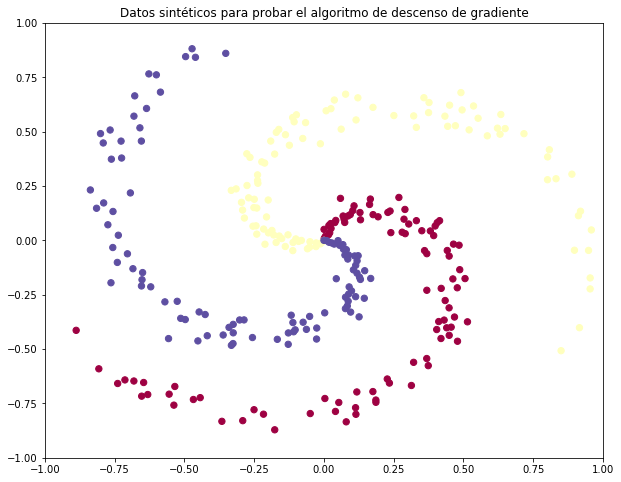

In [90]:
#  Biblioteca de graficación y configuracion de figuras
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#  Inicialización de datos
np.random.seed(0) # Aseguramos que siempre pasa lo mismo
N = 100 # Ejemplos por clase
D = 2 # Atributos
K = 3 # Clases
X = np.zeros((N * K, D))
Y = np.zeros((N * K, K), dtype='uint8')
y = np.zeros((N * K, 1), dtype='uint8')

# Genera datos en espiral
for clase in range(K):
  ix = list(range(N*clase, N*(clase+1)))  # Indices para cada clase
  r = np.linspace(0.0, 1, N) 
  t = np.linspace(clase * 4, (clase + 1) * 4, N) + np.random.randn(N) * 0.2 
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  Y[ix, clase] = 1
  y[ix] = clase


#  Grafica datos
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title("Datos sintéticos para probar el algoritmo de descenso de gradiente")


Como podemos ver, los datos generados tienen más de dos clases y no son linealmente separables. De lo que se infiere que el algoritmo más adaptado a este problema es una red neuronal con salida *softmax* y con al menos una capa oculta (o dos). 

En un primer paso, yo voy a hacer una red tipo softmax sin capas ocultas, la cual tendría que entrenarse fácilmente y debería ser fácil de visualizar si los resultados son correctos.

In [91]:
rn = inicializa_red_neuronal(capas=2, neuronas_por_capa=[2, 3], tipo_salida='softmax')

desc_grad_simple(rn, X, Y, alfa=0.2, max_epochs=1000)

Y_est = feedforward(X, rn)[-1].T
y_est = np.argmax(Y_est, axis=1)


Y ahora vamos a visualizar los resultados a ver si tienen sentido.

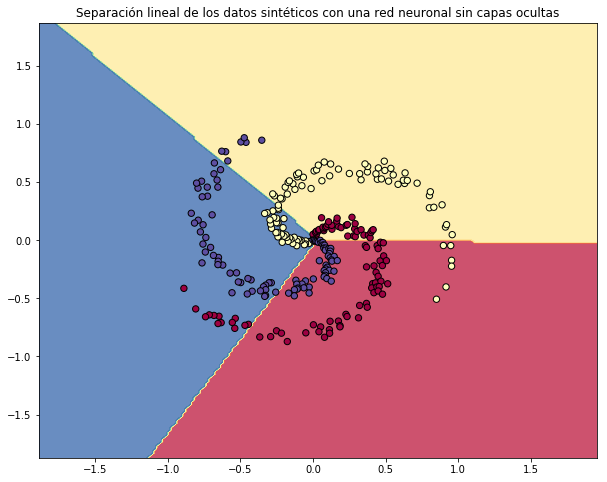

In [92]:
# Genera un grido en todo el espacio con datos a clasificar
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

# Calcula la predicción de clase para estos datos
Y_mesh = feedforward(X_mesh, rn)[-1].T
y_mesh = np.argmax(Y_mesh, axis=1)

# Ajusta las salidas en forma de matriz para graficar el contorno
y_mesh = y_mesh.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, y_mesh, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Separación lineal de los datos sintéticos con una red neuronal sin capas ocultas")

y si el programa funciona correctamente, el resultado debería ser una imagen como esta:

![Separación lineal de los datos sintéticos con una red neuronal sin capas ocultas](imagenes/espiral_linear.png)

Si este es el caso, entonces ya estamos listos para probar el algoritmo de descenso de gradiente para una red neuronal con capas ocultas.

#### Ejercicio: Realiza el aprendizaje con una red neuronal con capas ocultas, de forma que todos los datos sean correctamente clasificados y grafíca el resultado de manera similar a como se hizo para la red neuronal sin capas ocultas.

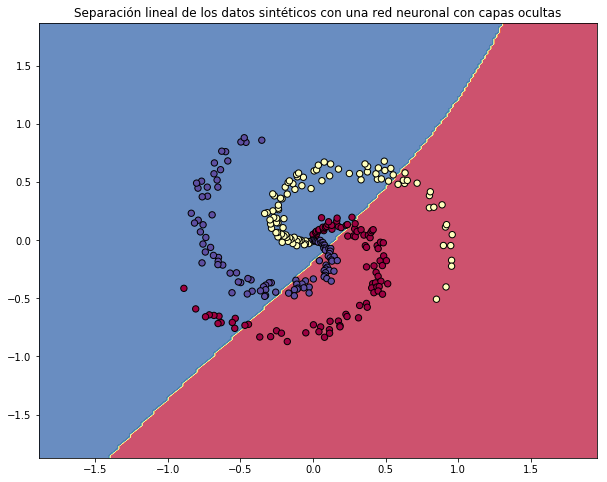

In [110]:
# Realiza el aprendizaje con una red neuronal con capas ocultas, 
# de forma que todos los datos sean correctamente clasificados 
# y grafíca el resultado de manera similar a como se hizo para 
# la red neuronal sin capas ocultas.

# El resultado de esta celfa debe de ser una figura similar a la 
# anterior pero que se pueda ver la partición no lineal del espacio

# -------------------------------------------
# Insertar código aquí
rn = inicializa_red_neuronal(capas=5, neuronas_por_capa=[2,3,2,6,3], tipo_salida='softmax')

desc_grad_simple(rn, X, Y, alfa=0.2, max_epochs=1000)

Y_est = feedforward(X, rn)[-1].T
y_est = np.argmax(Y_est, axis=1)
# -------------------------------------------
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

# Calcula la predicción de clase para estos datos
Y_mesh = feedforward(X_mesh, rn)[-1].T
y_mesh = np.argmax(Y_mesh, axis=1)

# Ajusta las salidas en forma de matriz para graficar el contorno
y_mesh = y_mesh.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, y_mesh, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Separación lineal de los datos sintéticos con una red neuronal con capas ocultas")
